# What is the distribution of paper lengths in CSCW?
by R. Stuart Geiger ([@staeiou](http://twitter.com/staeiou)), staff ethnographer, [Berkeley Institute for Data Science](http://bids.berkeley.edu)

Freely licensed under both [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/) and [The MIT License](https://opensource.org/licenses/MIT).

This includes 2019 data, which was not in the original paper.

This is the data analysis and visualization notebook, which builds off the `data/cscw-pages-notext-2019.csv` created in `code/data-cleaning-processing-2019.ipynb`



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker

import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as po

%matplotlib inline
sns.set(font_scale=2)
#pd.set_option('display.max_rows', -1)


## Data import and processing


In [2]:
merged_df = pd.read_csv("../data/cscw-pages-notext-2019.csv", index_col=0)

In [3]:
merged_df.sample(3).T

filename                                                              2011/p35-liao  \
words                                                                          8503   
year_float                                                                     2011   
characters                                                                    56207   
num_pages                                                                        10   
orientation                                                                       0   
year                                                                           2011   
words_per_page                                                                850.3   
chars_per_word                                                              6.61026   
appx_start                                                                    False   
ref_start                                                                     52349   
total_words                                                                    8503   
total_words_nopunct                                                            8352   
body_len_words                                                                 7935   
body_len_words_nopunct                                                         7786   
body_len_chars                                                                52349   
body_len_chars_nopunct                                                        50077   
appx_len_chars                                                                    0   
ref_len_chars                                                                  3858   
appx_len_chars_nopunct                                                            0   
ref_len_chars_nopunct                                                          3379   
appx_len_words                                                                    0   
ref_len_words                                                                   568   
appx_len_words_nopunct                                                            0   
ref_len_words_nopunct                                                           566   
chars_per_word_nopunct                                                      6.72977   
ref_count_approx                                                                 24   
words_nopunct_per_page                                                        835.2   
body_len_chars_alt                                                            52349   
body_len_words_alt                                                             7935   
appx_prop_words                                                                   0   
ref_prop_words                                                               0.0668   
appx_prop_chars                                                                   0   
ref_prop_chars                                                            0.0686391   
body_words_per_char                                                         6.59723   
ref_words_per_char                                                          6.79225   
appx_words_per_char                                                             NaN   
body_words_nopunct_per_ref_count                                            324.417   
filename.1                                                            2011/p35-liao   
title_from_text                   Enterprise Blogging In A Global Context: Compa...   
lead_author                                                                    liao   
title_has_quote                                                                   0   

filename                                                2014/p1377-wong  \
words                                                              8906   
year_float                                                         2014   
characters                                                        59146   
num_pages                                    

In [4]:
merged_df['year'].value_counts()

2019.0    205
2018.0    185
2017.0    183
2012.0    164
2015.0    161
2016.0    140
2013.0    139
2014.0    134
2017.5    105
2008.0     86
2004.0     75
2011.0     66
2006.0     61
2010.0     58
2002.0     39
2000.0     36
Name: year, dtype: int64

## Descriptive statistics


### Presented in the paper

"The longest paper published in CSCW before 2013 had a main section length of 10,578 words."

In [5]:
(merged_df.query("year_float < 2013 & num_pages > 4").body_len_words_nopunct).max()

10177

"The upper 95th percentile length for 2000-2012 non-note papers (> 4-pages) was 9,049 words."

In [6]:
(merged_df.query("year_float < 2013 & num_pages > 4").body_len_words_nopunct).quantile(.95)

9049.449999999999

"In the combined past two PACMHCI rounds, 51.0% of all papers had a main section length longer than the longest pre-2013 CSCW paper."

In [7]:
len(merged_df.query("year_float > 2017 & body_len_words_nopunct > 10177")) / len(merged_df.query("year_float > 2017"))

0.6121212121212121

"73.4\% of all PACMHCI papers had a main section length longer than the upper 95th percentile length for 2000-2012 non-note papers."

In [8]:
len(merged_df.query("year_float > 2017 & body_len_words_nopunct > 9049")) / len(merged_df.query("year_float > 2017"))

0.8262626262626263

### Exploratory / not presented in the paper

Descriptive statistics for non-notes before 2013

In [9]:
(merged_df.query("year_float < 2013 & num_pages > 4").body_len_words_nopunct).describe()

count      454.000000
mean      7514.209251
std       1042.471563
min       3905.000000
25%       6853.750000
50%       7561.000000
75%       8214.000000
max      10177.000000
Name: body_len_words_nopunct, dtype: float64

Descriptive statistics for notes before 2013

In [10]:
(merged_df.query("year_float < 2013 & num_pages == 4").body_len_words_nopunct).describe()

count     131.000000
mean     2966.114504
std       359.147059
min      1958.000000
25%      2736.000000
50%      2916.000000
75%      3177.000000
max      4016.000000
Name: body_len_words_nopunct, dtype: float64

Descriptive statistics for all papers after 2012

In [11]:
(merged_df.query("year_float > 2012").body_len_words_nopunct).describe()

count     1252.000000
mean      9451.676518
std       2155.394184
min       2738.000000
25%       8048.250000
50%       9317.000000
75%      10770.250000
max      17780.000000
Name: body_len_words_nopunct, dtype: float64

Descriptive statistics for all papers 2013-2017

In [12]:
(merged_df.query("year_float > 2012 & year_float < 2017.5").body_len_words_nopunct).describe()

count      757.000000
mean      8568.487450
std       1680.687783
min       2738.000000
25%       7612.000000
50%       8637.000000
75%       9618.000000
max      13568.000000
Name: body_len_words_nopunct, dtype: float64

Descriptive statistics for all papers in PACMHCI (2017.5 and 2018)

In [13]:
(merged_df.query("year_float > 2017").body_len_words_nopunct).describe()

count      495.000000
mean     10802.331313
std       2102.066070
min       4835.000000
25%       9482.000000
50%      10730.000000
75%      12191.000000
max      17780.000000
Name: body_len_words_nopunct, dtype: float64

What proportion of PACMHCI CSCW papers are longer than the upper median length paper published before 2013?

In [14]:
len(merged_df.query("year_float > 2017 & body_len_words > 7753")) / len(merged_df.query("year_float > 2017"))

0.9333333333333333

## Visualizations on word lengths

### Figure 1: Boxplot + stripplot for total number of words (incl. front matter, references, appendices)

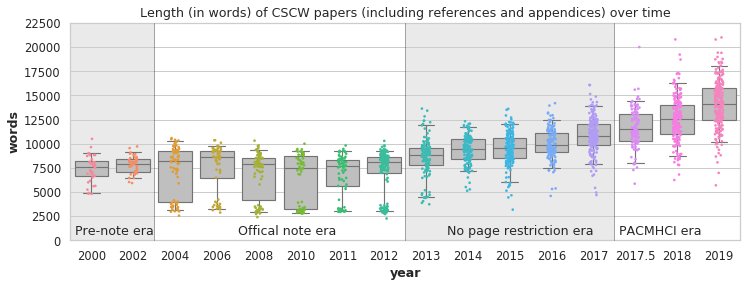

In [15]:
sns.set(font_scale=1.05, style='whitegrid')

fig, ax = plt.subplots(figsize=[12,4])

scatter = sns.stripplot(data=merged_df,
            y='total_words_nopunct',
            x='year',
            jitter=True,
            s=2.65,
            ax=ax
           )

sns.boxplot(data=merged_df,
            y='total_words_nopunct',
            x='year',
            color=".75",
            fliersize=0,
            linewidth=1.15,
            whis=[5,95],
            ax=ax
           )

plt.title("Length (in words) of CSCW papers (including references and appendices) over time")

ax.set_ylabel("words", fontweight='bold')
ax.set_xlabel("year", fontweight='bold')

# Create 3 lines that segment the 4 major periods

plt.axvline(1.5, ymin=0, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)
plt.axvline(7.5, ymin=0, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)
plt.axvline(12.5, ymin=0, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)

# Color the background grey for the first and third sections 

plt.axvspan(-2, 1.5, facecolor='.1', alpha=0.09, zorder=-100)
plt.axvspan(7.5, 12.5, facecolor='.1', alpha=0.09, zorder=-100)

# Label the sections

plt.text(-.4,600,"Pre-note era")
plt.text(3.5,600,"Offical note era")
plt.text(8.5,600,"No page restriction era")
plt.text(12.6,600,"PACMHCI era")

plt.ylim(0,22500)

ax.xaxis.set_ticklabels([2000,2002,2004,2006,2008,2010,2011,2012,2013,2014,2015,2016,2017,2017.5,2018,2019])

plt.savefig("../figures/fig1-word-len-all.pdf", bbox_inches='tight', dpi=300)
plt.savefig("../figures/fig1-word-len-all.png", bbox_inches='tight', dpi=600)

### Figure 2: Boxplot + stripplot for number of words in the main body + front matter (no references or appendices)

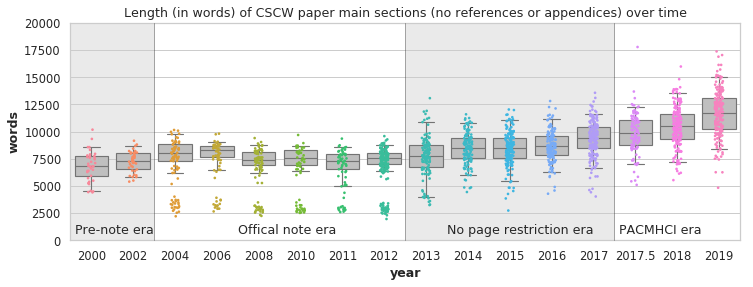

In [16]:
sns.set(font_scale=1.05, style='whitegrid')
fig, ax = plt.subplots(figsize=[12,4])

sns.stripplot(data=merged_df,
            y='body_len_words_nopunct',
            x='year',
            jitter=True,
            s=2.65,
            ax=ax
           )

sns.boxplot(data=merged_df.query("num_pages > 4"),
            y='body_len_words_nopunct',
            x='year',
            color=".75",
            fliersize=0,
            linewidth=1.15,
            whis=[5,95],
            ax=ax)
           

ax.set_ylabel("words", fontweight='bold')
ax.set_xlabel("year", fontweight='bold')

# Create 3 lines that segment the 4 major periods

plt.axvline(1.5, ymin=0, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)
plt.axvline(7.5, ymin=0, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)
plt.axvline(12.5, ymin=0, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)

# Color the background grey for the first and third sections 

plt.axvspan(-2, 1.5, facecolor='.1', alpha=0.09, zorder=-100)
plt.axvspan(7.5, 12.5, facecolor='.1', alpha=0.09, zorder=-100)

# Label the sections

plt.text(-.4,600,"Pre-note era")
plt.text(3.5,600,"Offical note era")
plt.text(8.5,600,"No page restriction era")
plt.text(12.6,600,"PACMHCI era")

plt.ylim(0,20000)

ax.xaxis.set_ticklabels([2000,2002,2004,2006,2008,2010,2011,2012,2013,2014,2015,2016,2017,2017.5,2018,2019])

plt.title("Length (in words) of CSCW paper main sections (no references or appendices) over time")
plt.savefig("../figures/fig2-word-len-body.pdf", bbox_inches='tight', dpi=300)
plt.savefig("../figures/fig2-word-len-body.png", bbox_inches='tight', dpi=600)


# Distribution of paper lengths by somewhat arbitrary categories
## Exploratory
### Histograms to identify break points

#### Distributions overall

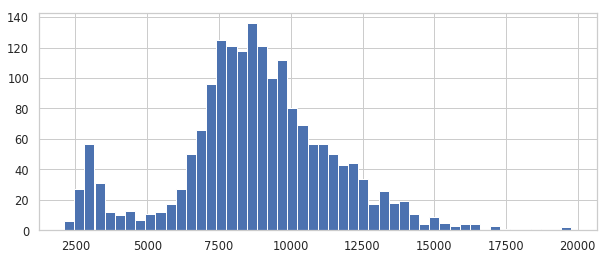

In [17]:
merged_df.body_len_words.hist(bins=50,figsize=[10,4])

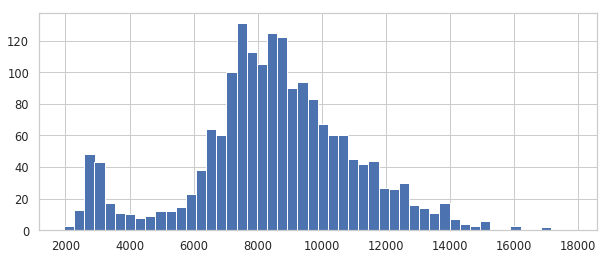

In [18]:
merged_df['body_len_words_nopunct'].hist(bins=50,figsize=[10,4])

#### Distributions in the official notes era

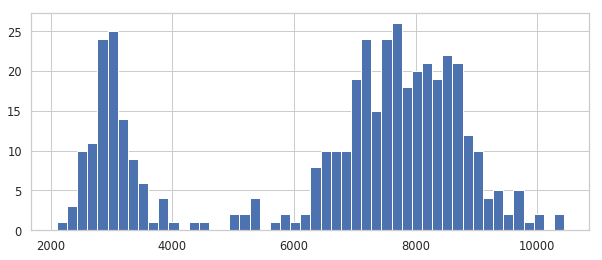

In [19]:
merged_df.query("2004 < year_float < 2013").body_len_words.hist(bins=50,figsize=[10,4])

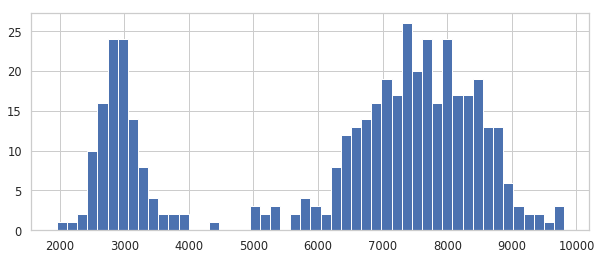

In [20]:
merged_df.query("2004 < year_float < 2013").body_len_words_nopunct.hist(bins=50,figsize=[10,4])

In [21]:
merged_df.query("4800 > body_len_words_nopunct > 4100 & 2004 < year_float < 2013").T

filename                                                             2011/p17-cheok
words                                                                          5559
year_float                                                                     2011
characters                                                                    36503
num_pages                                                                         8
orientation                                                                       0
year                                                                           2011
words_per_page                                                              694.875
chars_per_word                                                              6.56647
appx_start                                                                    False
ref_start                                                                     28893
total_words                                                                    5559
total_words_nopunct                                                            5547
body_len_words                                                                 4378
body_len_words_nopunct                                                         4371
body_len_chars                                                                28893
body_len_chars_nopunct                                                        28055
appx_len_chars                                                                    0
ref_len_chars                                                                  7610
appx_len_chars_nopunct                                                            0
ref_len_chars_nopunct                                                          6795
appx_len_words                                                                    0
ref_len_words                                                                  1181
appx_len_words_nopunct                                                            0
ref_len_words_nopunct                                                          1176
chars_per_word_nopunct                                                      6.58067
ref_count_approx                                                                 31
words_nopunct_per_page                                                      693.375
body_len_chars_alt                                                            28893
body_len_words_alt                                                             4378
appx_prop_words                                                                   0
ref_prop_words                                                             0.212448
appx_prop_chars                                                                   0
ref_prop_chars                                                             0.208476
body_words_per_char                                                         6.59959
ref_words_per_char                                                          6.44369
appx_words_per_char                                                             NaN
body_words_nopunct_per_ref_count                                                141
filename.1                                                           2011/p17-cheok
title_from_text                   Mixed Reality Lab Singapore: A Genealogy Of La...
lead_author                                                                   cheok
title_has_quote                                                                   0

In [22]:
merged_df.query("num_pages == 4").body_len_words.describe()

count     131.000000
mean     3036.893130
std       389.567319
min      2102.000000
25%      2810.000000
50%      3000.000000
75%      3238.500000
max      4536.000000
Name: body_len_words, dtype: float64

### Defining length functions

In [23]:
def is_note(row):
    #print(row)
    if float(row['words']) < 5000:
        return True
    else:
        return False

In [24]:
def paper_type(row):
    
    num_words = float(row['words'])
    
    if num_words < 2500:
        return 'abstract'
    elif 5000 > num_words > 2500:
        return 'note'
    elif 11000 > num_words > 5000:  
        return '10 pager'
    elif 16000 > num_words > 11000:
        return 'journal article'
    else:
        return 'long read'

In [25]:
def paper_type_alt(row):
    
    num_words = float(row['body_len_words'])
    
    if num_words < 4500:
        return 'note'
    elif 7500 > num_words >= 4500:
        return 'short paper'
    elif 10500 > num_words >= 7500:  
        return 'full paper'
    elif 15000 > num_words >= 10500:
        return 'journal article'
    elif num_words > 15000:
        return 'mega article'

In [26]:
def paper_type_nopunct(row):
    
    num_words = float(row['body_len_words_nopunct'])
    
    if num_words < 4500:
        return 'note'
    elif 7500 > num_words >= 4500:
        return 'short paper'
    elif 10500 > num_words >= 7500:  
        return 'full paper'
    elif 15000 > num_words >= 10500:
        return 'journal article'
    elif num_words > 15000:
        return 'mega article'

In [27]:
merged_df['is_note'] = merged_df.apply(is_note, axis=1)
merged_df['paper_type'] = merged_df.apply(paper_type, axis=1)
merged_df['paper_type_alt'] = merged_df.apply(paper_type_alt, axis=1)
merged_df['paper_type_nopunct'] = merged_df.apply(paper_type_nopunct, axis=1)

### Analysis on `paper_type_nopunct` function

In the paper, I ended up using the `paper_type_nopunct` function

In [28]:
merged_df.paper_type_alt.value_counts()

full paper         940
journal article    402
short paper        315
note               152
mega article        28
Name: paper_type_alt, dtype: int64

In [29]:
merged_df.paper_type_nopunct.value_counts()

full paper         930
short paper        390
journal article    347
note               155
mega article        14
Name: paper_type_nopunct, dtype: int64

In [30]:
df_types_count = merged_df.groupby('year'). \
            paper_type_nopunct.value_counts(normalize=False, sort=True).unstack()
df_types_count


paper_type_nopunct  full paper  journal article  mega article  note  \
year                                                                  
2000.0                    13.0              NaN           NaN   3.0   
2002.0                    17.0              NaN           NaN   NaN   
2004.0                    38.0              NaN           NaN  22.0   
2006.0                    35.0              NaN           NaN  15.0   
2008.0                    30.0              NaN           NaN  22.0   
2010.0                    19.0              NaN           NaN  22.0   
2011.0                    23.0              NaN           NaN  15.0   
2012.0                    66.0              NaN           NaN  37.0   
2013.0                    78.0              9.0           NaN  12.0   
2014.0                    90.0             12.0           NaN   1.0   
2015.0                   109.0             15.0           NaN   3.0   
2016.0                   102.0             13.0           NaN   1.0   
2017.0                   120.0             41.0           NaN   2.0   
2017.5                    55.0             36.0           1.0   NaN   
2018.0                    78.0             90.0           1.0   NaN   
2019.0                    57.0            131.0          12.0   NaN   

paper_type_nopunct  short paper  
year                             
2000.0                     20.0  
2002.0                     22.0  
2004.0                     15.0  
2006.0                     11.0  
2008.0                     34.0  
2010.0                     17.0  
2011.0                     28.0  
2012.0                     61.0  
2013.0                     40.0  
2014.0                     31.0  
2015.0                     34.0  
2016.0                     24.0  
2017.0                     20.0  
2017.5                     13.0  
2018.0                     16.0  
2019.0                      4.0

"From 2004 to 2012, there was a consistent cluster of notes and longer papers, with the proportion of notes ranging from 22.5\% (2011) to 38\% (2010)."

In [31]:
df_types = merged_df.groupby('year'). \
            paper_type_nopunct.value_counts(normalize=True, sort=True).unstack()
df_types


paper_type_nopunct  full paper  journal article  mega article      note  \
year                                                                      
2000.0                0.361111              NaN           NaN  0.083333   
2002.0                0.435897              NaN           NaN       NaN   
2004.0                0.506667              NaN           NaN  0.293333   
2006.0                0.573770              NaN           NaN  0.245902   
2008.0                0.348837              NaN           NaN  0.255814   
2010.0                0.327586              NaN           NaN  0.379310   
2011.0                0.348485              NaN           NaN  0.227273   
2012.0                0.402439              NaN           NaN  0.225610   
2013.0                0.561151         0.064748           NaN  0.086331   
2014.0                0.671642         0.089552           NaN  0.007463   
2015.0                0.677019         0.093168           NaN  0.018634   
2016.0                0.728571         0.092857           NaN  0.007143   
2017.0                0.655738         0.224044           NaN  0.010929   
2017.5                0.523810         0.342857      0.009524       NaN   
2018.0                0.421622         0.486486      0.005405       NaN   
2019.0                0.279412         0.642157      0.058824       NaN   

paper_type_nopunct  short paper  
year                             
2000.0                 0.555556  
2002.0                 0.564103  
2004.0                 0.200000  
2006.0                 0.180328  
2008.0                 0.395349  
2010.0                 0.293103  
2011.0                 0.424242  
2012.0                 0.371951  
2013.0                 0.287770  
2014.0                 0.231343  
2015.0                 0.211180  
2016.0                 0.171429  
2017.0                 0.109290  
2017.5                 0.123810  
2018.0                 0.086486  
2019.0                 0.019608

In [32]:
df_types = df_types[['note', 'short paper', 'full paper', 'journal article', 'mega article']]


### Figure 3: Distribution of somewhat arbitrary categories of main body length

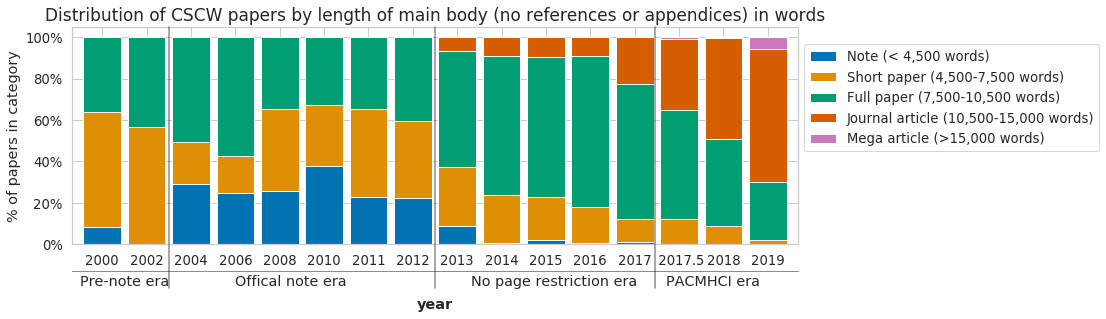

In [33]:
sns.set(font_scale=1.2, style="whitegrid")
pal = sns.color_palette("colorblind")

ax = df_types.plot(kind='bar', stacked=True, figsize=[13,4], width=.85, color=pal)

legend_labels = ['Note (< 4,500 words)', 'Short paper (4,500-7,500 words)', 'Full paper (7,500-10,500 words)', 'Journal article (10,500-15,000 words)', 'Mega article (>15,000 words)']
ax.legend(bbox_to_anchor=(1.0,.95), labels=legend_labels)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_ylabel("% of papers in category")

plt.title("Distribution of CSCW papers by length of main body (no references or appendices) in words",
         fontdict={'fontsize': 17})

#plt.axvspan(-2, 1.5, facecolor='.1', alpha=0.3, zorder=-100)
#plt.axvspan(7.5, 12.45, facecolor='.1', alpha=0.3,zorder=-100)

ax.set_xlabel("year", fontweight='bold', labelpad=30)

plt.text(-.5,-0.2,"Pre-note era")
plt.text(3,-0.2,"Offical note era")
plt.text(8.3,-0.2,"No page restriction era")
plt.text(12.7,-0.2,"PACMHCI era")

#plt.ylim(-.17,1.1)
#plt.ylim(0,20000)

ax.xaxis.set_ticklabels([2000,2002,2004,2006,2008,2010,2011,2012,2013,2014,2015,2016,2017," 2017.5",2018,2019])
plt.xticks(rotation='horizontal')

plt.axhline(-.13,  zorder=100, clip_on=False, color='k', alpha=.5, linewidth=1)


plt.axvline(1.5, ymin=-.2, zorder=100, clip_on=False, color='k', alpha=.5)
plt.axvline(7.5, ymin=-.2, zorder=100, clip_on=False, color='k', alpha=.5)
plt.axvline(12.45, ymin=-.2, zorder=100, clip_on=False, color='k', alpha=.5)
plt.ylim(0,1.05)
plt.savefig("../figures/fig3-dist-len-cat.pdf", bbox_inches='tight', dpi=300)

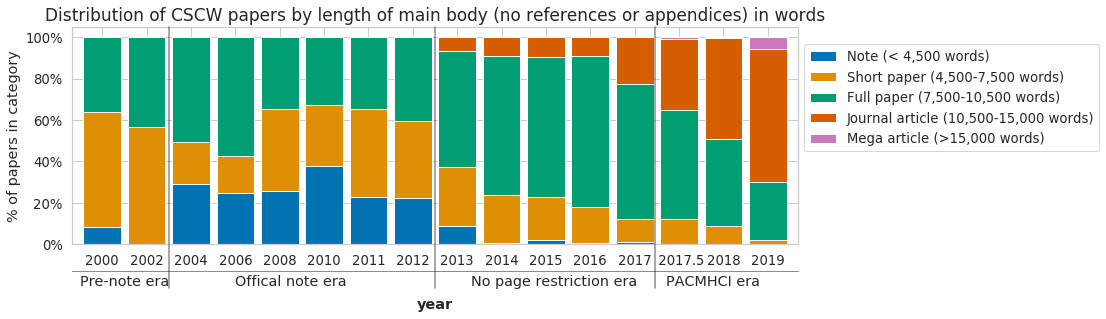

In [34]:
sns.set(font_scale=1.2, style="whitegrid")
pal = sns.color_palette("colorblind")

ax = df_types.plot(kind='bar', stacked=True, figsize=[13,4], width=.85, color=pal)

legend_labels = ['Note (< 4,500 words)', 'Short paper (4,500-7,500 words)', 'Full paper (7,500-10,500 words)', 'Journal article (10,500-15,000 words)', 'Mega article (>15,000 words)']
ax.legend(bbox_to_anchor=(1.0,.95), labels=legend_labels)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_ylabel("% of papers in category")
plt.title("Distribution of CSCW papers by length of main body (no references or appendices) in words",
         fontdict={'fontsize': 17})
#plt.axvspan(-2, 1.5, facecolor='.1', alpha=0.3, zorder=-100)
#plt.axvspan(7.5, 12.45, facecolor='.1', alpha=0.3,zorder=-100)
ax.set_xlabel("year", fontweight='bold', labelpad=30)

plt.text(-.5,-0.2,"Pre-note era")
plt.text(3,-0.2,"Offical note era")
plt.text(8.3,-0.2,"No page restriction era")
plt.text(12.7,-0.2,"PACMHCI era")
#plt.ylim(-.17,1.1)
#plt.ylim(0,20000)
ax.xaxis.set_ticklabels([2000,2002,2004,2006,2008,2010,2011,2012,2013,2014,2015,2016,2017," 2017.5",2018,2019])
plt.xticks(rotation='horizontal')

plt.axhline(-.13,  zorder=100, clip_on=False, color='k', alpha=.5, linewidth=1)


plt.axvline(1.5, ymin=-.2, zorder=100, clip_on=False, color='k', alpha=.5)
plt.axvline(7.5, ymin=-.2, zorder=100, clip_on=False, color='k', alpha=.5)
plt.axvline(12.45, ymin=-.2, zorder=100, clip_on=False, color='k', alpha=.5)
plt.ylim(0,1.05)
plt.savefig("../figures/fig3-dist-len-cat.pdf", bbox_inches='tight', dpi=300)

### Proportion of papers that have quotes in the title (not in the paper)

In [35]:
df_quote_title = merged_df.groupby('year')['title_has_quote'].value_counts(normalize=False, sort=True).unstack()
df_quote_title

title_has_quote      0     1
year                        
2000.0            36.0   NaN
2002.0            38.0   1.0
2004.0            74.0   1.0
2006.0            59.0   2.0
2008.0            84.0   2.0
2010.0            56.0   2.0
2011.0            62.0   4.0
2012.0           160.0   4.0
2013.0           133.0   6.0
2014.0           126.0   8.0
2015.0           151.0  10.0
2016.0           135.0   5.0
2017.0           169.0  14.0
2017.5            98.0   7.0
2018.0           170.0  15.0
2019.0           176.0  29.0

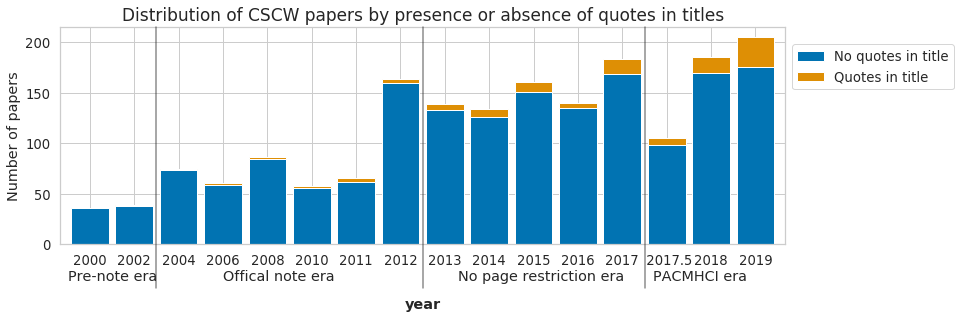

In [36]:
ax = df_quote_title.plot(kind='bar', stacked=True, figsize=[13,4], width=.85, color=pal)

ax.xaxis.set_ticklabels([2000,2002,2004,2006,2008,2010,2011,2012,2013,2014,2015,2016,2017," 2017.5",2018,2019])

legend_labels = ['No quotes in title', 'Quotes in title']
ax.legend(bbox_to_anchor=(1.0,.95), labels=legend_labels)

vals = ax.get_yticks()

ax.set_ylabel("Number of papers")
plt.title("Distribution of CSCW papers by presence or absence of quotes in titles",
         fontdict={'fontsize': 17})

ax.set_xlabel("year", fontweight='bold', labelpad=30)

plt.text(-.5,-36.2,"Pre-note era")
plt.text(3,-36.2,"Offical note era")
plt.text(8.3,-36.2,"No page restriction era")
plt.text(12.7,-36.2,"PACMHCI era")


ax.xaxis.set_ticklabels([2000,2002,2004,2006,2008,2010,2011,2012,2013,2014,2015,2016,2017," 2017.5",2018,2019])
plt.xticks(rotation='horizontal')

plt.axvline(1.5, ymin=-.2, zorder=100, clip_on=False, color='k', alpha=.5)
plt.axvline(7.5, ymin=-.2, zorder=100, clip_on=False, color='k', alpha=.5)
plt.axvline(12.52, ymin=-.2, zorder=100, clip_on=False, color='k', alpha=.5)

plt.savefig("../figures/quotes-in-titles.pdf", bbox_inches='tight', dpi=300)


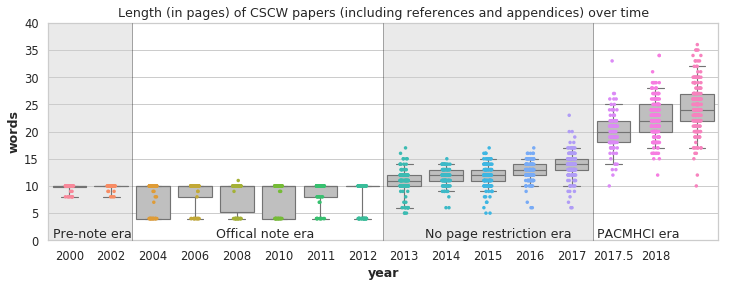

In [37]:
sns.set(font_scale=1.05, style='whitegrid')

fig, ax = plt.subplots(figsize=[12,4])

scatter = sns.stripplot(data=merged_df,
            y='num_pages',
            x='year',
            jitter=1,
            s=3.5,
            ax=ax
           )

sns.boxplot(data=merged_df,
            y='num_pages',
            x='year',
            color=".75",
            fliersize=0,
            linewidth=1.15,
            whis=[5,95],
            ax=ax
           )

plt.title("Length (in pages) of CSCW papers (including references and appendices) over time")

ax.set_ylabel("words", fontweight='bold')
ax.set_xlabel("year", fontweight='bold')

# Create 3 lines that segment the 4 major periods

plt.axvline(1.5, ymin=0, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)
plt.axvline(7.5, ymin=0, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)
plt.axvline(12.5, ymin=0, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)

# Color the background grey for the first and third sections 

plt.axvspan(-2, 1.5, facecolor='.1', alpha=0.09, zorder=-100)
plt.axvspan(7.5, 12.5, facecolor='.1', alpha=0.09, zorder=-100)

# Label the sections

plt.ylim(0,40)

plt.text(-.4,.5,"Pre-note era")
plt.text(3.5,.5,"Offical note era")
plt.text(8.5,.5,"No page restriction era")
plt.text(12.6,.5,"PACMHCI era")

l=ax.xaxis.set_ticklabels([2000,2002,2004,2006,2008,2010,2011,2012,2013,2014,2015,2016,2017,2017.5,2018])

plt.savefig("../figures/page-len-yearly.pdf", bbox_inches='tight', dpi=300)
plt.savefig("../figures/page-len-yearly.png", bbox_inches='tight', dpi=600)

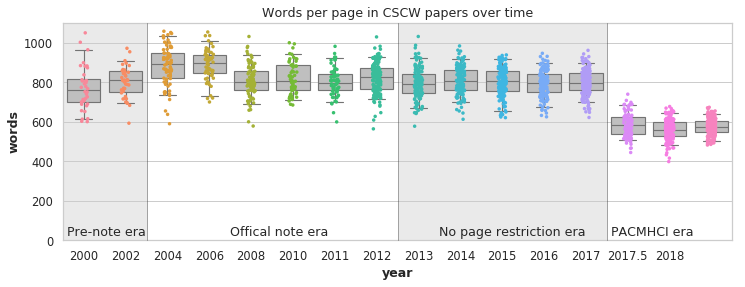

In [38]:
sns.set(font_scale=1.05, style='whitegrid')

fig, ax = plt.subplots(figsize=[12,4])

scatter = sns.stripplot(data=merged_df,
            y='words_nopunct_per_page',
            x='year',
            jitter=1,
            s=3.5,
            ax=ax
           )

sns.boxplot(data=merged_df,
            y='words_nopunct_per_page',
            x='year',
            color=".75",
            fliersize=0,
            linewidth=1.15,
            whis=[5,95],
            ax=ax
           )

plt.title("Words per page in CSCW papers over time")

ax.set_ylabel("words", fontweight='bold')
ax.set_xlabel("year", fontweight='bold')

# Create 3 lines that segment the 4 major periods

plt.axvline(1.5, ymin=0, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)
plt.axvline(7.5, ymin=0, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)
plt.axvline(12.5, ymin=0, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)

# Color the background grey for the first and third sections 

plt.axvspan(-2, 1.5, facecolor='.1', alpha=0.09, zorder=-100)
plt.axvspan(7.5, 12.5, facecolor='.1', alpha=0.09, zorder=-100)

# Label the sections

plt.ylim(0,1100)

plt.text(-.4,25,"Pre-note era")
plt.text(3.5,25,"Offical note era")
plt.text(8.5,25,"No page restriction era")
plt.text(12.6,25,"PACMHCI era")

l=ax.xaxis.set_ticklabels([2000,2002,2004,2006,2008,2010,2011,2012,2013,2014,2015,2016,2017,2017.5,2018])

plt.savefig("../figures/words-nopunct-per-page-yearly.pdf", bbox_inches='tight', dpi=300)
plt.savefig("../figures/words-nopunct-per-page-yearly.png", bbox_inches='tight', dpi=600)

## Interactive/web visualizations

This `year_str` is because I haven't figured out how to get some visualization libraries like `plotly` to plot years as separate categories. It tries to be smart and plot it on a time axis.

In [39]:
merged_df['filename'] = merged_df.index

In [40]:
!mkdir ../figures/web/

mkdir: cannot create directory ‘../figures/web/’: File exists


### Visualizations

In [41]:
fig = px.box(merged_df,y='num_pages',
             x='year', hover_data=['title_from_text','lead_author'],
             points='all', range_x=[-1,15.5],
             title="Length in pages of CSCW papers (incl. references and appendixes) by year")

fig.update_layout()
fig.update_xaxes(type="category")

fig.show()

po.plot(fig, filename="../figures/web/page_len_by_year.html")


'../figures/web/page_len_by_year.html'

In [42]:
fig = px.box(merged_df,y='words_nopunct_per_page',
             x='year', hover_data=['title_from_text','lead_author'],
             points='all', range_x=[-1,15.5],
             title="Words per page (nopunct method) in CSCW papers by year")

fig.update_layout()
fig.update_xaxes(type="category")
fig.show()
po.plot(fig, filename="../figures/web/words_per_page_nopunct_by_year.html")

'../figures/web/words_per_page_nopunct_by_year.html'

In [43]:
fig = px.box(merged_df,y='body_len_words_nopunct',
             x='year', hover_data=['title_from_text','lead_author'],
            points='all',range_x=[-1,15.5], title="Length in words (nopunct method) of CSCW paper main sections (no references or appendixes) by year")

fig.update_layout()
fig.update_xaxes(type="category")
fig.show()
po.plot(fig, filename="../figures/web/body_len_words_nopunct_by_year.html")


'../figures/web/body_len_words_nopunct_by_year.html'

In [44]:
fig = px.box(merged_df,y='total_words_nopunct',
             x='year', hover_data=['title_from_text','lead_author'],
            points='all',range_x=[-1,15.5], title="Length in words (nopunct method) of CSCW papers (incl. references and appendixes) by year")

fig.update_layout()
fig.update_xaxes(type="category")
fig.show()
po.plot(fig, filename="../figures/web/total_words_nopunct_by_year.html")


'../figures/web/total_words_nopunct_by_year.html'

In [45]:
fig = px.box(merged_df,y='body_len_words',
             x='year', hover_data=['title_from_text','lead_author'],
            points='all',range_x=[-1,15.5], title="Length in words (punct method) of CSCW paper main sections (no references or appendixes) by year")

fig.update_layout()
fig.update_xaxes(type="category")
fig.show()
po.plot(fig, filename="../figures/web/body_len_words_punct_by_year.html")



'../figures/web/body_len_words_punct_by_year.html'

In [46]:
fig = px.box(merged_df.query("body_len_words_nopunct > 4500"),y='body_len_words_nopunct',
             x='year', hover_data=['title_from_text','lead_author'],
            points='all',range_x=[-1,15.5], title="Length in words (nopunct) of non-note (> 4500 word) CSCW paper main sections (no refs or appxs)")

fig.update_layout()
fig.update_xaxes(type="category")
fig.show()
po.plot(fig, filename="../figures/web/body_len_words_nopunct_nonnotes_by_year.html")



'../figures/web/body_len_words_nopunct_nonnotes_by_year.html'

In [47]:
fig = px.box(merged_df,y='ref_count_approx',
             x='year', hover_data=['title_from_text','lead_author'],
            points='all',range_x=[-1,15.5], title="Number of references (approximate) in CSCW papers by year")

fig.update_layout()
fig.update_xaxes(type="category")
fig.show()
po.plot(fig, filename="../figures/web/ref_count_approx_by_year.html")



'../figures/web/ref_count_approx_by_year.html'

In [48]:
fig = px.box(merged_df,y='body_words_per_char',
             x='year', hover_data=['title_from_text','lead_author'],
             points='all', range_x=[-1,15.5],
             title="Number of characters per word (nopunct) in main body sections (no refs/appxs)")

fig.update_layout()
fig.update_xaxes(type="category")
po.plot(fig, filename="../figures/web/ref_count_approx_by_year.html")
fig.show()

In [49]:
sns.set(style="darkgrid")
fig = px.scatter(merged_df,y='ref_count_approx', x='body_len_words_nopunct',color='year',
                  hover_data=['title_from_text','lead_author','num_pages'],template="none",
                color_continuous_scale=px.colors.sequential.Viridis,)

fig.update_traces(marker=dict(line=dict(width=1,
                                        color='rgba(0, 0, 0, 1)')),
                  selector=dict(mode='markers'))
fig.update_layout()
fig.show()

po.plot(fig, filename="../figures/web/scatter_ref_count_by_body_len_words_nopunct.html")


'../figures/web/scatter_ref_count_by_body_len_words_nopunct.html'

In [50]:
fig = px.scatter(merged_df,y='body_len_words_nopunct', x='words_nopunct_per_page',color='year',
                  hover_data=['title_from_text','lead_author','num_pages'],template="none",
                color_continuous_scale=px.colors.sequential.Viridis,)

fig.update_traces(marker=dict(line=dict(width=1,
                                        color='rgba(0, 0, 0, 1)')),
                  selector=dict(mode='markers'))
fig.update_layout()
fig.show()

po.plot(fig, filename="../figures/web/scatter_words_nopunct_per_page_by_len_words_nopunct.html")


'../figures/web/scatter_words_nopunct_per_page_by_len_words_nopunct.html'

In [51]:
merged_df.sample(3).T

filename                                             2019/cscw068-wang  \
words                                                            13889   
year_float                                                        2019   
characters                                                       98204   
num_pages                                                           24   
orientation                                                        NaN   
year                                                              2019   
words_per_page                                                 578.708   
chars_per_word                                                 7.07063   
appx_start                                                       False   
ref_start                                                        74155   
total_words                                                      13889   
total_words_nopunct                                              13834   
body_len_words                                                   10922   
body_len_words_nopunct                                           10914   
body_len_chars                                                   74155   
body_len_chars_nopunct                                           72173   
appx_len_chars                                                       0   
ref_len_chars                                                    24049   
appx_len_chars_nopunct                                               0   
ref_len_chars_nopunct                                            22016   
appx_len_words                                                       0   
ref_len_words                                                     2967   
appx_len_words_nopunct                                               0   
ref_len_words_nopunct                                             2920   
chars_per_word_nopunct                                         7.09874   
ref_count_approx                                                    94   
words_nopunct_per_page                                         576.417   
body_len_chars_alt                                               74155   
body_len_words_alt                                               10922   
appx_prop_words                                                      0   
ref_prop_words                                                0.213622   
appx_prop_chars                                                      0   
ref_prop_chars                                                0.244888   
body_words_per_char                                            6.78951   
ref_words_per_char                                             8.10549   
appx_words_per_char                                                NaN   
body_words_nopunct_per_ref_count                               116.106   
filename.1                                           2019/cscw068-wang   
title_from_text                   Culturally-Embedded Visual Literacy:   
lead_author                                                       wang   
title_has_quote                                                      0   
is_note                                                          False   
paper_type                                             journal article   
paper_type_alt                                         journal article   
paper_type_nopunct                                     journal article   
filename                                             2019/cscw068-wang   

filename                                                            2017.5/a088-raj  \
words                                                                         12656   
year_float                                                                   2017.5   
characters                                                                    89870   
num_pages                                                                        18   
orientation                                                                       0   

In [52]:
fig = px.box(merged_df[merged_df['title_from_text'].str.contains('wiki',case=False) == True],y='body_len_words_nopunct',
             x='year', hover_data=['title_from_text','lead_author'],
            points='all', title="Length in words (nopunct) of CSCW paper main sections (no refs/appxs) -- papers with 'wiki' in title")

fig.update_layout()
fig.update_xaxes(type="category")
fig.show()

In [53]:
pd.set_option('display.max_colwidth', -1)
import html

In [54]:
def gs_link(title):
    return """<a href="https://scholar.google.com/scholar?hl=en&as_sdt=0%2C5&q=""" + html.escape(title.replace(" ","+")) + """" target="_blank">""" + title + "</a>"

In [55]:
merged_df['title'] = merged_df['title_from_text'].apply(gs_link)

In [56]:
merged_df[['filename','year','title','lead_author','num_pages','total_words',
           'total_words_nopunct','body_len_words', 'body_len_words_nopunct','body_len_chars',
           'ref_len_chars', 'ref_len_words', 'ref_len_words_nopunct',
           'appx_len_chars', 'appx_len_words','appx_len_words_nopunct',
           'ref_count_approx','words_per_page','words_nopunct_per_page','chars_per_word',
           'body_words_per_char', 'ref_words_per_char', 'appx_words_per_char',
           'body_words_nopunct_per_ref_count','title_has_quote']].to_html("../figures/web/web_table.html",escape=False,index=False)

In [57]:
import csv

In [58]:
merged_df[['filename','year','title_from_text','lead_author','num_pages','total_words',
           'total_words_nopunct','body_len_words', 'body_len_words_nopunct','body_len_chars',
           'ref_len_chars', 'ref_len_words', 'ref_len_words_nopunct',
           'appx_len_chars', 'appx_len_words','appx_len_words_nopunct',
           'ref_count_approx','words_per_page','words_nopunct_per_page','chars_per_word',
           'body_words_per_char', 'ref_words_per_char', 'appx_words_per_char',
           'body_words_nopunct_per_ref_count','title_has_quote']].to_csv("../data/cscw19_geiger_data.csv",
                                                                        quoting=csv.QUOTE_NONNUMERIC,
                                                                        index=False)